In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [2]:
# def f(x):
#     return x*x

# def fDeriv(x):
#     return 2*x

def f(x):
    return (x * x * x * x * x) + (x * x * x) + x - 10

def fDeriv(x):
    return 5 * x*x*x*x + 3*x*x + 1
    # return 1

# def f(x):
#     return x**2 * (1-x)**3

# def fDeriv(x):
#     return 0

# 2x (1-x)^3 + 3*(1-x)^2*2x
# 0: 0
# 1: 0


def f(x):
    return math.sin(20*x)**3

def fDeriv(x):
    if x == 0 or x == math.pi/2:
        return 0
    return 60 * (math.sin(20*x)**2) * math.cos(20*x)



In [3]:
# равноотстоящие узлы
def createEquallySpacedPoints(a,b,N):
    """ 
    (x_0,...,x_N) -- N+1 точка

    """
    X = []
    H = []
    x_ = a
    for i in range(N+1):
        x = a + i * (b-a)/N
        # y = f(x)
        X.append(x)
        H.append(x-x_)
        x_ = x  
    H.pop(0)
    return X, H


# чтение из файла
def createPointsFromFile(filename):
     
    """ 
    (x_0,...,x_N) -- N+1 точка
    
    """
    X = []
    H = []
    
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        if lines:
            first_x = float(lines[0].strip())
            X.append(first_x)
            x_ = first_x
            
            for line in lines[1:]:
                x = float(line.strip())
                # y = f(x)
                X.append(x)
                H.append(x - x_)
                x_ = x
            
    return X, H


def createPointsFromFile2(filename):
     
    """ 
    (x_0,...,x_N) -- N+1 точка
    
    """
    X = []
    F = []
    W = []
    H = []
    # F[0] = 0

    with open(filename, 'r') as file:
        lines = file.readlines()

        
        if lines:
            # first_x = float(lines[0].strip())
            # X.append(first_x)
            # F.append(first_f)
            # W.append(first_w)
            # x_ = first_x
            
            
            for line in lines:
                values = line.strip().split()
                if len(values) >= 3:
                    x = float(values[0])
                    f = float(values[1])
                    w = float(values[2])
                    
                    X.append(x)
                    F.append(f)
                    W.append(w)
            if len(X) > 1:
                for i in range(1, len(X)):
                    H.append(X[i] - X[i-1])
            
    return X, F, W, H

In [4]:
def createVecF(X):
    """ 
    F = (f'(x_0), f(x_1), ..., f(x_{N-1}), f'(x_N))
    """
    N = len(X) # подразумевается N+1
    F = [0.0] * N 
    F[0] = fDeriv(X[0])
    for i in range(1, N-1):
        F[i] = f(X[i])
    F[N-1] = fDeriv(X[N-1])
    return F

def createVecWeights(N, weight):
    W = [weight] * (N+1)
    # for i in range(0, N):
    #     W[i] = 0.001

    return W


def createRightSide(H, F, W):
    N = len(F) # подразумевается N+1
    B = [0.0] * N
    B[0] = F[0] 
    B[N-1] = F[N-1] 
    for i in range(1, N-1):
        h_ = H[i-1]
        h = H[i]
        w_ = W[i-1]
        w = W[i]
        # print(f"h_ = {h_}, h = {h}, F[{i-1}] = {F[i-1]},  F[{i}] = {F[i]},  F[{i+1}] = {F[i+1]}")

        B[i] = ( - w_/(h_*h_) * F[i-1] \
                 + (w_/(h_*h_) - w/(h*h)) * F[i] \
                 + w/(h*h) * F[i+1] ) * 3.0 
               
    return B

def createMatrix(N, H, W):
    M = [[0.0 for _ in range(N+1)] for _ in range(N+1)]
    for i in range(N+1):  
        if i == 0:
            M[0][0] = 1.0
        elif i == N:   
            M[N][N] = 1.0 
        else:
            h_ = H[i-1]   
            h  = H[i]   
            w_ = W[i-1]
            w = W[i]     
            M[i][i - 1] = w_ / h_
            M[i][i] = (2.0 * w_) / h_ + (2.0 * w )/ h 
            M[i][i + 1] = w / h 
    return M


In [5]:
def solveTridiag(M, f):
    """
    Решение трехдиагональной системы методом прогонки
    
    Параметры:
    a - нижняя диагональ 
    c - главная диагональ
    b - верхняя диагональ
    f - правая часть
    
    Возвращает:
    y - решение системы
    """

    N = len(f)  # подразумевается N+1
    N -= 1

    alpha = [0.0] * (N+1)  
    beta  = [0.0] * (N+1)
    y = [0.0] * (N+1)

    a = [0.0] * (N+1)  
    b = [0.0] * (N+1) 
    c = [0.0] * (N+1)  
    
    # b[0]   =  - 1.0 * M[0][1]
    # a[N-1] =  - 1.0 * M[N][N-1]
    b[0] = 0.0
    a[N] = 0.0

    for i in range(N+1):
        c[i] = M[i][i]
        if (i > 0 and i < N):
            a[i] = - 1.0 * M[i][i-1]
            b[i] = - 1.0 * M[i][i+1]
    
    # Прямой ход 
    alpha[1] = b[0] / c[0]
    beta[1] = f[0] / c[0]
    
    for i in range(1, N):
        denom = c[i] - a[i] * alpha[i]
        alpha[i + 1] = b[i] / denom
        beta[i + 1]  = (f[i] + a[i] * beta[i]) / denom
    
    denom = c[N] - a[N] * alpha[N]
    y[N] = (f[N] + a[N] * beta[N]) / denom
    
    # Обратный ход 
    for i in range(N-1, -1, -1):
        y[i] = alpha[i + 1] * y[i + 1] + beta[i + 1]
    
    return y



In [6]:
def buildSpline(x, xi, xi_, h, m_, m, fi_, fi):
    A = (x-xi) * (x-xi) * (x-xi_) / (h*h)
    B = (x-xi_)*(x-xi_) * (x-xi) / (h*h)
    C = (x-xi) * (x-xi) * (2.*(x - xi_) + h) / (h*h*h)
    D = (x-xi_)*(x-xi_) * (2.*(x - xi) - h)  / (-h*h*h) 

    return A*m_ + B*m + C*fi_ + D*fi

def buildAllSplines(X, y, F):

    N = len(X) - 1
   
    F[0] = f(X[0])
    F[N] = f(X[N])
    splines = []
    
    for i in range(1,N+1):
        xi_ = X[i-1]      
        xi  = X[i]   
        h   = xi - xi_   
        
        m_ = y[i-1]      
        m  = y[i]    
        fi_ = F[i-1]   
        fi  = F[i]  
        
        # Создаем лок сплайн для этого отрезка
        def spline_func(x, xi=xi, xi_=xi_, h=h, m_=m_, m=m, fi_=fi_, fi=fi):
            return buildSpline(x, xi, xi_, h, m_, m, fi_, fi)
        
        splines.append((xi_, xi, spline_func))
    
    return splines


def splineValue(x, splines):
    """Возвращает значение сплайна в точке x"""
    for (xLeft, xRight, Sloc) in splines:
        if xLeft <= x <= xRight:
            return Sloc(x)
    # если вне диапазона
    if x < splines[0][0]:
        return splines[0][2](x)
    return splines[-1][2](x)



    # N = len(X)
    # F[0] = f(X[0])
    # F[N] = f(X[N])
    # splines = []
    # xi_ = x[0]
    # xi  = x[1]
    # # h_  = H[0]
    # # h   = H[1]

    # for x in X:

    #     h = H[i]

        




In [7]:
N = 9 
eps = 0.001
X, H = createEquallySpacedPoints(0,2,N)

# N = 10
# X, H = createEquallySpacedPoints(0, math.pi/2, N)


# X, H = createPointsFromFile("nodes.txt")
# N = len(X) - 1

F = createVecF(X)
W = createVecWeights(N, eps)
B = createRightSide(H, F, W)
A = createMatrix(N, H, W)
y = solveTridiag(A, B)

print(f" X = {X}")
print(f" H = {H}")
print(f" F = {F}")
print(f" B = {B}\n\n")

for row in A:
    print([f"{val:.2f}" for val in row])
print(f" y =  {y}")

splines = buildAllSplines(X, y, F)

print("Значения сплайна в узлах:")
for x in X:
    val = splineValue(x, splines)
    print(f"S({x:.3f}) = {val:.6f}   (f(x) = {f(x):.6f})")



# H

 X = [0.0, 0.2222222222222222, 0.4444444444444444, 0.6666666666666666, 0.8888888888888888, 1.1111111111111112, 1.3333333333333333, 1.5555555555555556, 1.7777777777777777, 2.0]
 H = [0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.22222222222222232, 0.2222222222222221, 0.22222222222222232, 0.2222222222222221, 0.22222222222222232]
 F = [0, -0.8967257213408476, 0.13312417241068772, 0.3341853608129533, -0.676958375991794, -0.012012570976634386, 0.997962422815917, -0.02703163301506321, -0.5935689368671306, -22.216785482682358]
 B = [0, 0.00808729347394928, 0.07477784824084341, -0.04921251481545076, -0.021031524356217485, 0.10175143852756847, -0.0009124080188344242, -0.09668553010074513, -1.348027546367287, -22.216785482682358]


['1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
['0.00', '0.02', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
['0.00', '0.00', '0.02', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00

         x       f(x)       S(x)  |f(x)-S(x)|
  0.000000   0.000000   0.000000     0.000000
  0.025000   0.110195   0.122353     0.012158
  0.050000   0.595823   0.388927     0.206896
  0.075000   0.992504   0.648994     0.343509
  0.100000   0.751827   0.751827     0.000000
  0.125000   0.214354   0.593420     0.379066
  0.150000   0.002810   0.256662     0.253852
  0.175000  -0.043163  -0.128834     0.085671
  0.200000  -0.433459  -0.433459     0.000000
  0.225000  -0.934094  -0.555268     0.378826
  0.250000  -0.881765  -0.502995     0.378770
  0.275000  -0.351209  -0.313043     0.038166
  0.300000  -0.021815  -0.021815     0.000000
  0.325000   0.009955   0.327110     0.317155
  0.350000   0.283576   0.661437     0.377861
  0.375000   0.825294   0.901695     0.076401
  0.400000   0.968413   0.968413     0.000000
  0.425000   0.509101   0.812253     0.303153
  0.450000   0.069995   0.504410     0.434416
  0.475000  -0.000424   0.146214     0.146638
  0.500000  -0.161008  -0.161008  

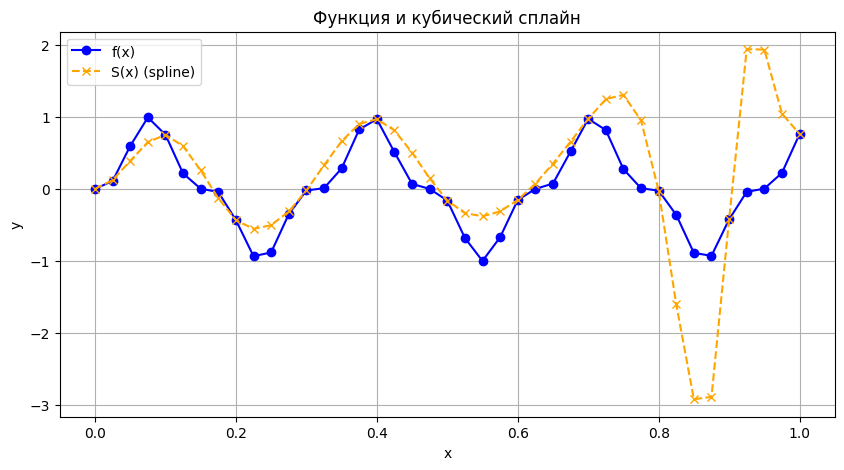

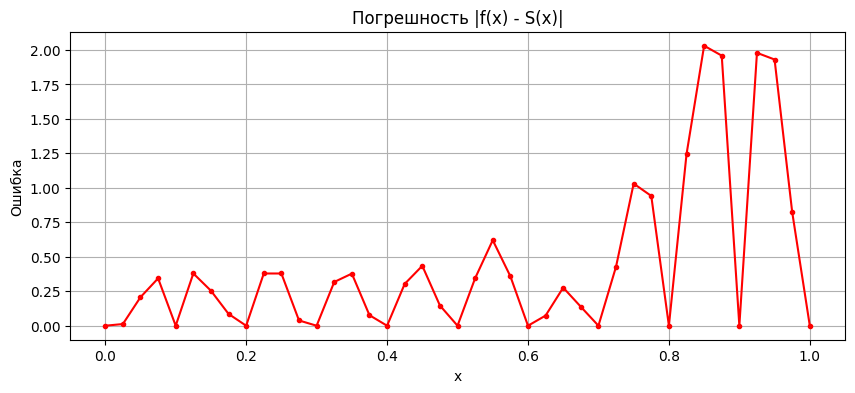

In [8]:

def insertPointsX(X, k):
    """
    Вставляет k дополнительных точек между каждым соседним узлом.
    
    X — список узлов [x0, x1, ..., xN]
    k — сколько точек вставлять между каждой парой
    """
    extendedX = []
    for i in range(len(X) - 1):
        x_ = X[i]
        x = X[i + 1]
        extendedX.append(x_)
        for j in range(1, k + 1):
            xNew = x_ + j * (x - x_) / (k + 1)
            extendedX.append(xNew)
    extendedX.append(X[-1])
    return extendedX


N = 10
X, H = createEquallySpacedPoints(0, 1, N)


# N = 100
# X, H = createEquallySpacedPoints(0, math.pi/2, N)


# X, H = createPointsFromFile("nodes.txt")
# N = len(X) - 1


F = createVecF(X)
W = createVecWeights(N, eps)
B = createRightSide(H, F, W)
A = createMatrix(N, H, W)
Y = solveTridiag(A, B)
splines = buildAllSplines(X, Y, F)

XX = insertPointsX(X, k=3)   

data = []
for x in XX:
    fx = f(x)
    sx = splineValue(x, splines)
    err = abs(fx - sx)
    data.append((x, fx, sx, err))

df = pd.DataFrame(data, columns=['x', 'f(x)', 'S(x)', '|f(x)-S(x)|'])
print(df.to_string(index=False, float_format=lambda v: f"{v:10.6f}"))

xVals = [d[0] for d in data]
fVals = [d[1] for d in data]
sVals = [d[2] for d in data]
errVals = [d[3] for d in data]

with open("error.txt", "w") as fout:
    fout.write(f"{'x':>10} {'f(x)':>15} {'S(x)':>15} {'|f(x)-S(x)|':>15}\n")
    fout.write("-" * 60 + "\n")
    for x, fx, sx, err in data:
        fout.write(f"{x:10.6f} {fx:15.8f} {sx:15.8f} {err:15.8e}\n")

max_err = max(abs(fx - sx) for _, fx, sx, _ in data)
print(f"\n Максимальная ошибка: {max_err:.6e}")

plt.figure(figsize=(10,5))
plt.plot(xVals, fVals, 'o-', label='f(x)', color='blue')
plt.plot(xVals, sVals, 'x--', label='S(x) (spline)', color='orange')
plt.title("Функция и кубический сплайн")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(xVals, errVals, 'r.-')
plt.title("Погрешность |f(x) - S(x)|")
plt.xlabel("x")
plt.ylabel("Ошибка")
plt.grid(True)
plt.show()


# Сплайн с натяжением

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x * x * x * x * x) + (x * x * x) + x - 10

def fDeriv(x):
    # return 5 * x*x*x*x + 3*x*x + 1
    return 1

# def f(x):
#     return math.sin(20*x)**3

# def fDeriv(x):
#     if x == 0 or x == math.pi/2:
#         return 0
#     return 60 * (math.sin(20*x)**2) * math.cos(20*x)


def createEquallySpacedPoints(a, b, N):
    X = []
    H = []
    x_ = a
    for i in range(N + 1):
        x = a + i * (b - a) / N
        X.append(x)
        H.append(x - x_)
        x_ = x
    H.pop(0)
    return X, H

def createVecF(X):
    N = len(X)
    F = [0.0] * N
    # F[0] = fDeriv(X[0])
    for i in range(1, N - 1):
        F[i] = f(X[i])
    F[N - 1] = fDeriv(X[N - 1])
    return F

def createVecWeights(N):
    return np.ones(N)   


def createRightSide(H, F, W):
    N = len(F)           # N+1 узлов
    B = [0.0] * N
    B[0] = F[0]
    B[-1] = F[-1]
    for i in range(1, N - 1):
        h_ = H[i - 1]
        h = H[i]
        w_ = W[i - 1]
        w = W[i]
        B[i] = (
            - w_ / (h_ ** 2) * F[i - 1]
            + (w_ / (h_ ** 2) - w / (h ** 2)) * F[i]
            + w / (h ** 2) * F[i + 1]
        ) * 3.0
    return B

def createMatrix(N, H, W):
    M = [[0.0 for _ in range(N + 1)] for _ in range(N + 1)]
    for i in range(N + 1):
        if i == 0:
            M[i][i] = 1.0
        elif i == N:
            M[i][i] = 1.0
        else:
            h_ = H[i - 1]
            h = H[i]
            w_ = W[i - 1]
            w = W[i]
            M[i][i - 1] = w_ / h_
            M[i][i] = 2.0 * (w_ / h_ + w / h)
            M[i][i + 1] = w / h
    return M

def solveTridiag(M, B):
    M = np.array(M)
    B = np.array(B)
    return np.linalg.solve(M, B)


def buildSpline(x, xi, xi_, h, m_, m, fi_, fi):
    A = (x - xi) * (x - xi) * (x - xi_) / (h * h)
    B = (x - xi_) * (x - xi_) * (x - xi) / (h * h)
    C = (x - xi) * (x - xi) * (2. * (x - xi_) + h) / (h * h * h)
    D = (x - xi_) * (x - xi_) * (2. * (x - xi) - h) / (-h * h * h)
    return A * m_ + B * m + C * fi_ + D * fi

def buildAllSplines(X, y, F):
    N = len(X) - 1
    F[0] = f(X[0])
    F[N] = f(X[N])
    splines = []
    for i in range(1, N + 1):
        xi_ = X[i - 1]
        xi = X[i]
        h = xi - xi_
        m_ = y[i - 1]
        m = y[i]
        fi_ = F[i - 1]
        fi = F[i]
        def spline_func(x, xi=xi, xi_=xi_, h=h, m_=m_, m=m, fi_=fi_, fi=fi):
            return buildSpline(x, xi, xi_, h, m_, m, fi_, fi)
        splines.append((xi_, xi, spline_func))
    return splines

def splineValue(x, splines):
    for (xLeft, xRight, Sloc) in splines:
        if xLeft <= x <= xRight:
            return Sloc(x)
    if x < splines[0][0]:
        return splines[0][2](x)
    return splines[-1][2](x)


def checkMonotonicity(xs, ys):
    dy = np.diff(ys)
    neg = np.where(dy < 0)[0]   # индексы отрезков (между узлами xs)
    return neg

def intervalIndexToNode(idx, xs, X):
    # idx — индекс шага между узлами в сетке xs (0..len(xs)-2)
    # найдем x середины этого шага и ближайший узел из X (возвращаем индекс узла)
    xmid = 0.5 * (xs[idx] + xs[idx+1])
    node = int(np.argmin(np.abs(np.array(X) - xmid)))
    return node

# Процесс построения сплайна при заданных весах
def buildSplineByWeights(X, H, F_, W):
    N = len(X) - 1
    B = createRightSide(H, F_, W)
    A = createMatrix(N, H, W)
    y = solveTridiag(A, B)
    splines = buildAllSplines(X, y, F_)
    return splines



In [10]:

def empiricalWeightTuning(X, H, F, W, maxIters=50, change_factor=2.0):
    xs = np.linspace(X[0], X[-1], 1000)
    history = []
    
    for iteration in range(maxIters):
        
        splines = buildSplineByWeights(X, H, F, W) #  сплайн с текущими весами
        ys = np.array([splineValue(x, splines) for x in xs])
        
        dy = np.diff(ys)  
        decreasing_points = np.where(dy < 0)[0] 
        num_decreasing = len(decreasing_points)
        
        print(f"Итерация {iteration}: {num_decreasing} нарушений монотонности")
        history.append((iteration, W.copy(), num_decreasing))

        if num_decreasing == 0:
            print("Сплайн стал монотонным")
            return W, splines, history

        if len(decreasing_points) > 0:
           
            problem_center = decreasing_points[len(decreasing_points) // 2]  #середина проблемной зоны
            x_problem = 0.5 * (xs[problem_center] + xs[problem_center + 1])
            
           
            nearest_node = np.argmin(np.abs(np.array(X) - x_problem))  # ближайший узел сплайна к проблеме
            
            nodes_to_try = []
            
            # Левый сосед проблемного узла
            if nearest_node > 0:
                nodes_to_try.append(nearest_node - 1)
            
            # Правый сосед проблемного узла  
            if nearest_node < len(X) - 1:
                nodes_to_try.append(nearest_node + 1)
            
            nodes_to_try.append(nearest_node) # проблемный узел
            
            print(f"  Проблема около x={x_problem:.3f}, пробуем узлы: {nodes_to_try}")
            
            improved = False
            for node in nodes_to_try:
                old_weight = W[node]
                
                W[node] = old_weight * change_factor
                try:
                    spl_test = buildSplineByWeights(X, H, F, W)
                    ys_test = np.array([splineValue(x, spl_test) for x in xs])
                    new_decreasing = np.sum(np.diff(ys_test) < 0)
                    
                    if new_decreasing < num_decreasing:
                        print(f"W[{node}] увеличен в {change_factor} раз")
                        improved = True
                        break
                    else:
                        W[node] = old_weight  # откат
                except:
                    W[node] = old_weight
                
                W[node] = old_weight / change_factor
                try:
                    spl_test = buildSplineByWeights(X, H, F, W)
                    ys_test = np.array([splineValue(x, spl_test) for x in xs])
                    new_decreasing = np.sum(np.diff(ys_test) < 0)
                    
                    if new_decreasing < num_decreasing:
                        print(f"W[{node}] уменьшен в {change_factor} раз")
                        improved = True
                        break
                    else:
                        W[node] = old_weight  # откат
                except:
                    W[node] = old_weight

            if not improved:
                print("Дальнейшие улучшения невозможны")
                break

    splines = buildSplineByWeights(X, H, F, W)
    return W, splines, history

In [22]:
def createPointsFromFile2(filename):
     
    """ 
    (x_0,...,x_N) -- N+1 точка
    
    """
    X = []
    F = []
    F_ = []
    W = []
    H = []
    # F[0] = 0

    with open(filename, 'r') as file:
        lines = file.readlines()        
        if lines:
            for line in lines:
                values = line.strip().split()
                if len(values) >= 3:
                    x = float(values[0])
                    f = float(values[1])
                    w = float(values[2])
                    
                    X.append(x)
                    F.append(f)
                    F_.append(f)
                    W.append(w)
            if len(X) > 1:
                for i in range(1, len(X)):
                    H.append(X[i] - X[i-1])
    return X, F, F_, W, H


def insertPointsX(X, k):
    """
    Вставляет k дополнительных точек между каждым соседним узлом.
    
    X — список узлов [x0, x1, ..., xN]
    k — сколько точек вставлять между каждой парой
    """
    extendedX = []
    for i in range(len(X) - 1):
        x_ = X[i]
        x = X[i + 1]
        extendedX.append(x_)
        for j in range(1, k + 1):
            xNew = x_ + j * (x - x_) / (k + 1)
            extendedX.append(xNew)
    extendedX.append(X[-1])
    return extendedX

[7.99, 8.09, 8.19, 8.7, 9.2, 10.0, 12.0, 15.0, 20.0]
[0.09999999999999964, 0.09999999999999964, 0.5099999999999998, 0.5, 0.8000000000000007, 2.0, 3.0, 5.0]
         x       f(x)           S(x)    |f(x)-S(x)|
  7.990000   0.000000   33071.783759   33071.783759
  8.090000   0.000028       0.000028       0.000000
  8.190000   0.043750       0.043750       0.000000
  8.700000   0.169183       0.169183       0.000000
  9.200000   0.469428       0.469428       0.000000
 10.000000   0.943740       0.943740       0.000000
 12.000000   0.998636       0.998636       0.000000
 15.000000   0.999916       1.000000       0.000084
 20.000000   0.999994 3208010.000000 3208009.000006

 Максимальная ошибка: 3.208009e+06


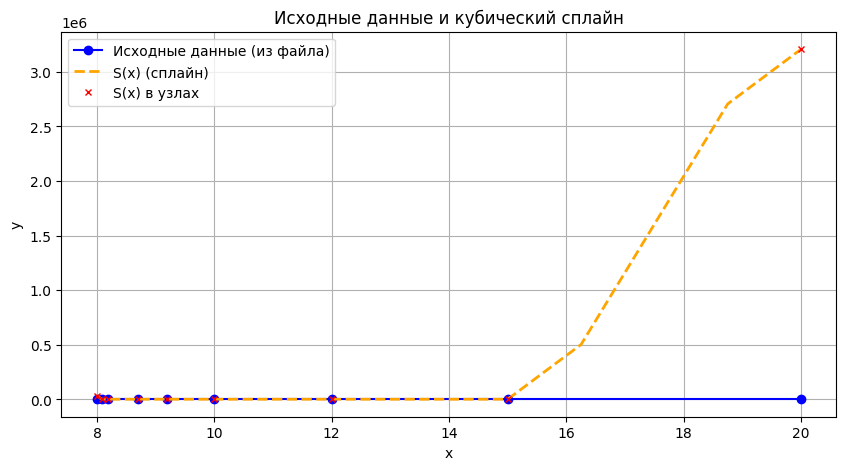

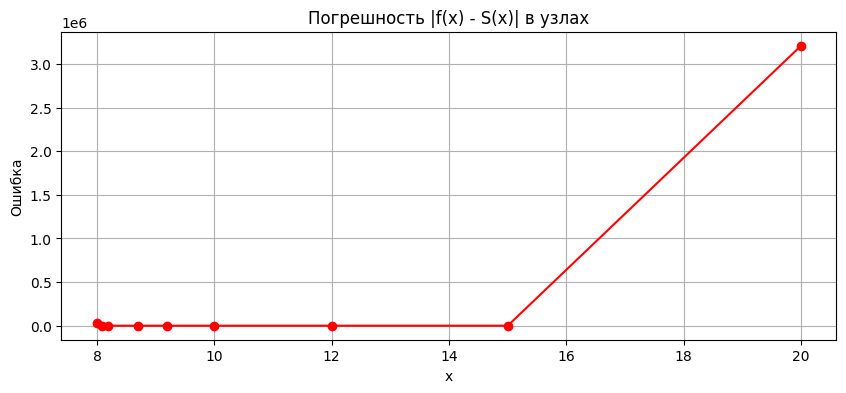

In [ ]:
X, F, F_, W, H = createPointsFromFile2("nodes1.txt")
N = len(X) - 1
F_[0] = fDeriv(X[0])
F_[N-1] = fDeriv(X[N-1])


# F[0] = F[N-1] = 1

print(X)
print(H)

# X, H = createEquallySpacedPoints(0, 1, N)
# F = createVecF(X)
# W = createVecWeights(len(X))   

# сплайн при W=1 для сравнения
splInit = buildSplineByWeights(X, H, F_, W.copy())
splines = splInit


dataNodes = []
for i, x in enumerate(X):
    origVal = F[i]  # Исходное значение из файла
    sx = splineValue(x, splines)  # Значение сплайна
    err = abs(origVal - sx)
    dataNodes.append((x, origVal, sx, err))


XX = insertPointsX(X, k=3)  
dataSpline = []
for x in XX:
    sx = splineValue(x, splines)
    dataSpline.append((x, sx))


df = pd.DataFrame(dataNodes, columns=['x', 'f(x)', 'S(x)', '|f(x)-S(x)|'])
print(df.to_string(index=False, float_format=lambda v: f"{v:10.6f}"))


xNodes = [d[0] for d in dataNodes]
fNodes = [d[1] for d in dataNodes]
sNodes = [d[2] for d in dataNodes]
errNodes = [d[3] for d in dataNodes]

xSpline = [d[0] for d in dataSpline]
sSpline = [d[1] for d in dataSpline]



with open("error.txt", "w") as fout:
    fout.write(f"{'x':>10} {'f(x)':>15} {'S(x)':>15} {'|f(x)-S(x)|':>15}\n")
    fout.write("-" * 60 + "\n")
    for x, fx, sx, err in dataNodes:
        fout.write(f"{x:10.6f} {fx:15.8f} {sx:15.8f} {err:15.8e}\n")

max_err = max(errNodes)
print(f"\n Максимальная ошибка: {max_err:.6e}")

plt.figure(figsize=(10,5))
# Исходные данные из файла
plt.plot(xNodes, fNodes, 'o-', label='Исходные данные (из файла)', color='blue', markersize=6)
# Сплайн (гладкая кривая)
plt.plot(xSpline, sSpline, '--', label='S(x) (сплайн)', color='orange', linewidth=2)
# Значения сплайна в узлах (для проверки совпадения)
plt.plot(xNodes, sNodes, 'x', label='S(x) в узлах', color='red', markersize=4)

plt.title("Исходные данные и кубический сплайн")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(xNodes, errNodes, 'ro-')
plt.title("Погрешность |f(x) - S(x)| в узлах")
plt.xlabel("x")
plt.ylabel("Ошибка")
plt.grid(True)
plt.show()




# xs = np.linspace(X[0], X[-1], 1000)
# ys_init = np.array([splineValue(x, spl_init) for x in xs])

# # W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W,
# #                                                    maxIters=100,
# #                                                    change_factor=1000)
# W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W)


# ys_final = np.array([splineValue(x, spl_final) for x in xs])



# plt.figure(figsize=(10,5))
# plt.plot(xs, [f(x) for x in xs], 'k--', label='f(x)')
# plt.plot(xs, ys_init, 'r', label='spline init (W=1)')
# plt.plot(xs, ys_final, 'b', label='spline final (W tuned)')
# plt.scatter(X, [f(x) for x in X], color='black', s=20)
# plt.title('Сплайн: до и после')
# plt.legend()
# plt.grid(True)
# plt.show()

# print("Итоговые веса:")
# for i, wi in enumerate(W_final):
#     print(f"  W[{i}] = {wi:.6g}")

# print("\nИстория (iter, neg_count):")
# for rec in hist:
#     print(f"  iter {rec[0]}: neg = {rec[2]}")





In [13]:
# # CHECK:


# def insertPointsX(X, k):
#     """
#     Вставляет k дополнительных точек между каждым соседним узлом.
    
#     X — список узлов [x0, x1, ..., xN]
#     k — сколько точек вставлять между каждой парой
#     """
#     extendedX = []
#     for i in range(len(X) - 1):
#         x_ = X[i]
#         x = X[i + 1]
#         extendedX.append(x_)
#         for j in range(1, k + 1):
#             xNew = x_ + j * (x - x_) / (k + 1)
#             extendedX.append(xNew)
#     extendedX.append(X[-1])
#     return extendedX


# # N = 100
# # X, H = createEquallySpacedPoints(0, math.pi/2.0, N)


# N = 9
# X, F, W, H = createPointsFromFile2("nodes1.txt")


# # X, H = createPointsFromFile("nodes.txt")
# # N = len(X) - 1


# # F = createVecF(X)
# B = createRightSide(H, F)
# A = createMatrix(N, H)
# Y = solveTridiag(A, B)
# splines = buildAllSplines(X, Y, F)

# XX = insertPointsX(X, k=0)   

# data = []
# for x in XX:
#     fx = f(x)
#     sx = splineValue(x, splines)
#     err = abs(fx - sx)
#     data.append((x, fx, sx, err))

# df = pd.DataFrame(data, columns=['x', 'f(x)', 'S(x)', '|f(x)-S(x)|'])
# print(df.to_string(index=False, float_format=lambda v: f"{v:10.6f}"))

# xVals = [d[0] for d in data]
# fVals = [d[1] for d in data]
# sVals = [d[2] for d in data]
# errVals = [d[3] for d in data]

# with open("error.txt", "w") as fout:
#     fout.write(f"{'x':>10} {'f(x)':>15} {'S(x)':>15} {'|f(x)-S(x)|':>15}\n")
#     fout.write("-" * 60 + "\n")
#     for x, fx, sx, err in data:
#         fout.write(f"{x:10.6f} {fx:15.8f} {sx:15.8f} {err:15.8e}\n")

# max_err = max(abs(fx - sx) for _, fx, sx, _ in data)
# print(f"\n Максимальная ошибка: {max_err:.6e}")

# plt.figure(figsize=(10,5))
# plt.plot(xVals, fVals, 'o-', label='f(x)', color='blue')
# plt.plot(xVals, sVals, 'x--', label='S(x) (spline)', color='orange')
# plt.title("Функция и кубический сплайн")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend()
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(10,4))
# plt.plot(xVals, errVals, 'r.-')
# plt.title("Погрешность |f(x) - S(x)|")
# plt.xlabel("x")
# plt.ylabel("Ошибка")
# plt.grid(True)
# plt.show()



In [14]:
# def createPointsFromFile2(filename):
     
#     """ 
#     (x_0,...,x_N) -- N+1 точка
    
#     """
#     X = []
#     F = []
#     W = []
#     H = []
#     # F[0] = 0

#     with open(filename, 'r') as file:
#         lines = file.readlines()

        
#         if lines:
#             # first_x = float(lines[0].strip())
#             # X.append(first_x)
#             # F.append(first_f)
#             # W.append(first_w)
#             # x_ = first_x
            
            
#             for line in lines:
#                 values = line.strip().split()
#                 if len(values) >= 3:
#                     x = float(values[0])
#                     f = float(values[1])
#                     w = float(values[2])
                    
#                     X.append(x)
#                     F.append(f)
#                     W.append(w)
#             if len(X) > 1:
#                 for i in range(1, len(X)):
#                     H.append(X[i] - X[i-1])
            
#     return X, F, W, H


# if __name__ == "__main__":
#     N = 9
#     X, F, W, H = createPointsFromFile2("nodes1.txt")
#     F[0] = F[N-1] = 1

#     print(X)
#     # X, H = createEquallySpacedPoints(0, 1, N)
#     # F = createVecF(X)
#     # W = createVecWeights(len(X))   
    
#     # сплайн при W=1 для сравнения
#     spl_init = buildSplineByWeights(X, H, F, W.copy())
#     xs = np.linspace(X[0], X[-1], 1000)
#     ys_init = np.array([splineValue(x, spl_init) for x in xs])

#     # W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W,
#     #                                                    maxIters=100,
#     #                                                    change_factor=1000)
#     W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W)
    

#     ys_final = np.array([splineValue(x, spl_final) for x in xs])



#     plt.figure(figsize=(10,5))
#     plt.plot(xs, [f(x) for x in xs], 'k--', label='f(x)')
#     plt.plot(xs, ys_init, 'r', label='spline init (W=1)')
#     plt.plot(xs, ys_final, 'b', label='spline final (W tuned)')
#     plt.scatter(X, [f(x) for x in X], color='black', s=20)
#     plt.title('Сплайн: до и после')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     print("Итоговые веса:")
#     for i, wi in enumerate(W_final):
#         print(f"  W[{i}] = {wi:.6g}")

#     print("\nИстория (iter, neg_count):")
#     for rec in hist:
#         print(f"  iter {rec[0]}: neg = {rec[2]}")





In [15]:
# def createPointsFromFile2(filename):
     
#     """ 
#     (x_0,...,x_N) -- N+1 точка
    
#     """
#     X = []
#     F = []
#     W = []
#     H = []
#     # F[0] = 0

#     with open(filename, 'r') as file:
#         lines = file.readlines()

        
#         if lines:
#             # first_x = float(lines[0].strip())
#             # X.append(first_x)
#             # F.append(first_f)
#             # W.append(first_w)
#             # x_ = first_x
            
            
#             for line in lines:
#                 values = line.strip().split()
#                 if len(values) >= 3:
#                     x = float(values[0])
#                     f = float(values[1])
#                     w = float(values[2])
                    
#                     X.append(x)
#                     F.append(f)
#                     W.append(w)
#             if len(X) > 1:
#                 for i in range(1, len(X)):
#                     H.append(X[i] - X[i-1])
            
#     return X, F, W, H


# if __name__ == "__main__":
#     N = 11
#     X, F, W, H = createPointsFromFile2("nodes2.txt")
#     F[0] = F[N-1] = 1

#     print(X)
#     # X, H = createEquallySpacedPoints(0, 1, N)
#     # F = createVecF(X)
#     # W = createVecWeights(len(X))   
    
#     # сплайн при W=1 для сравнения
#     spl_init = buildSplineByWeights(X, H, F, W.copy())
#     xs = np.linspace(X[0], X[-1], 1000)
#     ys_init = np.array([splineValue(x, spl_init) for x in xs])

#     # W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W,
#     #                                                    maxIters=100,
#     #                                                    change_factor=1000)
#     W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W)
    

#     ys_final = np.array([splineValue(x, spl_final) for x in xs])



#     plt.figure(figsize=(10,5))
#     plt.plot(xs, [f(x) for x in xs], 'k--', label='f(x)')
#     plt.plot(xs, ys_init, 'r', label='spline init (W=1)')
#     plt.plot(xs, ys_final, 'b', label='spline final (W tuned)')
#     plt.scatter(X, [f(x) for x in X], color='black', s=20)
#     plt.title('Сплайн: до и после')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     print("Итоговые веса:")
#     for i, wi in enumerate(W_final):
#         print(f"  W[{i}] = {wi:.6g}")

#     print("\nИстория (iter, neg_count):")
#     for rec in hist:
#         print(f"  iter {rec[0]}: neg = {rec[2]}")





In [16]:
# def empiricalWeightTuning(X, H, F, W, maxIters=50, change_factor=22.0):
#     xs = np.linspace(X[0], X[-1], 1000)
#     history = []
    
#     for iteration in range(maxIters):
#         splines = buildSplineByWeights(X, H, F, W)
#         ys = np.array([splineValue(x, splines) for x in xs])
        
#         dy = np.diff(ys)  
#         decreasing_intervals = np.where(dy < 0)[0]
#         num_decreasing = len(decreasing_intervals)
        
#         print(f"Итерация {iteration}: {num_decreasing} нарушений монотонности")
#         history.append((iteration, W.copy(), num_decreasing))

#         if num_decreasing == 0:
#             print("Сплайн стал монотонным!")
#             return W, splines, history

#         improved = False
        
#         for problem_idx in decreasing_intervals:
#             # Определяем, какой интервал сплайна содержит проблемную точку
#             x_problem = 0.5 * (xs[problem_idx] + xs[problem_idx + 1])
            
#             # Находим индекс интервала сплайна, содержащего проблемную точку
#             spline_idx = -1
#             for i, (x_left, x_right, _) in enumerate(splines):
#                 if x_left <= x_problem <= x_right:
#                     spline_idx = i
#                     break
            
#             if spline_idx == -1:
#                 continue
                
#             # Увеличиваем веса в узлах, окружающих проблемный интервал
#             nodes_to_adjust = []
#             if spline_idx > 0:
#                 nodes_to_adjust.append(spline_idx - 1)  # левый узел
#             nodes_to_adjust.append(spline_idx)          # текущий узел
#             if spline_idx < len(X) - 2:
#                 nodes_to_adjust.append(spline_idx + 1)  # правый узел
            
#             print(f"  Проблема в интервале [{splines[spline_idx][0]:.3f}, {splines[spline_idx][1]:.3f}], корректируем узлы: {nodes_to_adjust}")
            
#             # Сохраняем текущие веса
#             old_weights = W.copy()
            
#             # Увеличиваем веса в проблемной области
#             for node in nodes_to_adjust:
#                 W[node] *= change_factor
            
#             # Проверяем, улучшилась ли ситуация
#             try:
#                 spl_test = buildSplineByWeights(X, H, F, W)
#                 ys_test = np.array([splineValue(x, spl_test) for x in xs])
#                 new_decreasing = np.sum(np.diff(ys_test) < 0)
                
#                 if new_decreasing < num_decreasing:
#                     print(f"  Улучшение: нарушения уменьшились с {num_decreasing} до {new_decreasing}")
#                     improved = True
#                     break
#                 else:
#                     # Если не улучшилось, возвращаем веса и пробуем другой подход
#                     W = old_weights.copy()
                    
#                     # Пробуем увеличить веса еще больше только в центральном узле
#                     W[spline_idx] *= change_factor * 2
#                     spl_test = buildSplineByWeights(X, H, F, W)
#                     ys_test = np.array([splineValue(x, spl_test) for x in xs])
#                     new_decreasing = np.sum(np.diff(ys_test) < 0)
                    
#                     if new_decreasing < num_decreasing:
#                         print(f"  Улучшение (только центральный узел): нарушения уменьшились до {new_decreasing}")
#                         improved = True
#                         break
#                     else:
#                         W = old_weights.copy()
                        
#             except Exception as e:
#                 print(f"  Ошибка при тестировании: {e}")
#                 W = old_weights.copy()
        
#         if not improved:
#             print("Дальнейшие улучшения невозможны")
#             # Попробуем глобальное увеличение весов
#             if iteration == 0:
#                 print("Пробуем глобальное увеличение весов...")
#                 W = [w * change_factor for w in W]
#             else:
#                 break

#     splines = buildSplineByWeights(X, H, F, W)
#     return W, splines, history


# # def empiricalWeightTuning(X, H, F, W, maxIters=50, change_factor=2.0):
# #     xs = np.linspace(X[0], X[-1], 1000)
# #     history = []
    
# #     for iteration in range(maxIters):
# #         splines = buildSplineByWeights(X, H, F, W)
# #         ys = np.array([splineValue(x, splines) for x in xs])
        
# #         dy = np.diff(ys)  
# #         decreasing_intervals = np.where(dy < 0)[0]
# #         num_decreasing = len(decreasing_intervals)
        
# #         print(f"Итерация {iteration}: {num_decreasing} нарушений монотонности")
# #         history.append((iteration, W.copy(), num_decreasing))

# #         if num_decreasing == 0:
# #             print("Сплайн стал монотонным!")
# #             return W, splines, history

# #         # Анализируем проблемные интервалы: от самых центральных к краевым
# #         improved = False
        
# #         # 1. Группируем проблемные точки по зонам и сортируем по "центральности"
# #         problem_zones = []
# #         in_problem_zone = False
# #         zone_start = 0
        
# #         for i in range(len(dy)):
# #             if dy[i] < 0 and not in_problem_zone:
# #                 in_problem_zone = True
# #                 zone_start = i
# #             elif dy[i] >= 0 and in_problem_zone:
# #                 in_problem_zone = False
# #                 zone_center = (zone_start + (i-1)) // 2
# #                 # Вычисляем "удаленность от краев" - чем больше значение, тем центральнее проблема
# #                 centrality = min(zone_center, len(dy) - 1 - zone_center)
# #                 problem_zones.append((zone_start, i-1, centrality, zone_center))
        
# #         if in_problem_zone:
# #             zone_center = (zone_start + len(dy) - 1) // 2
# #             centrality = min(zone_center, len(dy) - 1 - zone_center)
# #             problem_zones.append((zone_start, len(dy)-1, centrality, zone_center))
        
# #         # 2. Сортируем проблемные зоны: сначала самые центральные (наибольшее centrality)
# #         problem_zones.sort(key=lambda x: x[2], reverse=True)
        
# #         print(f"  Обнаружено {len(problem_zones)} проблемных зон (отсортированы по центральности):")
# #         for start, end, centrality, center in problem_zones:
# #             print(f"    Зона [{xs[start]:.3f}, {xs[end]:.3f}], центральность: {centrality}")
        
# #         # 3. Обрабатываем зоны от самых центральных к краевым
# #         for zone_start, zone_end, centrality, zone_center in problem_zones:
# #             x_center = xs[zone_center]
            
# #             # Находим интервал сплайна, содержащий центральную точку проблемы
# #             spline_idx = -1
# #             for i, (x_left, x_right, _) in enumerate(splines):
# #                 if x_left <= x_center <= x_right:
# #                     spline_idx = i
# #                     break
            
# #             if spline_idx == -1:
# #                 continue
            
# #             # Определяем узлы для коррекции (влияющие на проблемный интервал)
# #             nodes_to_adjust = []
# #             # Всегда корректируем узлы, определяющие проблемный интервал
# #             nodes_to_adjust.append(spline_idx)      # левый узел интервала [x_i, x_{i+1}]
# #             nodes_to_adjust.append(spline_idx + 1)  # правый узел интервала [x_i, x_{i+1}]
            
# #             # Добавляем соседние узлы для более сильного воздействия на центральные проблемы
# #             if centrality > len(dy) * 0.3:  # Если проблема достаточно центральная
# #                 if spline_idx > 0:
# #                     nodes_to_adjust.append(spline_idx - 1)
# #                 if spline_idx < len(X) - 2:
# #                     nodes_to_adjust.append(spline_idx + 2)
            
# #             # Убираем дубликаты и сортируем
# #             nodes_to_adjust = sorted(set(nodes_to_adjust))
# #             nodes_to_adjust = [n for n in nodes_to_adjust if 0 <= n < len(X)]
            
# #             print(f"  Обрабатываем центральную зону (центральность {centrality}):")
# #             print(f"    Центр: x={x_center:.3f}, интервал сплайна: {spline_idx}")
# #             print(f"    Корректируем узлы: {nodes_to_adjust}")
            
# #             # Сохраняем текущие веса
# #             old_weights = W.copy()
            
# #             # Увеличиваем веса в проблемной области
# #             # Для центральных проблем делаем более сильное воздействие
# #             factor = change_factor
# #             if centrality > len(dy) * 0.4:  # Очень центральная проблема
# #                 factor *= 1.5
            
# #             for node in nodes_to_adjust:
# #                 W[node] *= factor
            
# #             # Проверяем улучшение
# #             try:
# #                 spl_test = buildSplineByWeights(X, H, F, W)
# #                 ys_test = np.array([splineValue(x, spl_test) for x in xs])
# #                 new_decreasing = np.sum(np.diff(ys_test) < 0)
                
# #                 if new_decreasing < num_decreasing:
# #                     print(f"    ✓ Улучшение: нарушения уменьшились с {num_decreasing} до {new_decreasing}")
# #                     improved = True
                    
# #                     # Если это была центральная проблема и улучшение значительное, 
# #                     # можно сразу перейти к следующей итерации
# #                     if centrality > len(dy) * 0.3 and (num_decreasing - new_decreasing) > 2:
# #                         print(f"    Значительное улучшение центральной зоны, переходим к следующей итерации")
# #                         break
# #                     else:
# #                         continue
# #                 else:
# #                     # Если не улучшилось, пробуем другой подход для этой зоны
# #                     W = old_weights.copy()
                    
# #                     # Пробуем увеличить только основные узлы интервала
# #                     W[spline_idx] *= factor * 1.2
# #                     W[spline_idx + 1] *= factor * 1.2
                    
# #                     spl_test = buildSplineByWeights(X, H, F, W)
# #                     ys_test = np.array([splineValue(x, spl_test) for x in xs])
# #                     new_decreasing = np.sum(np.diff(ys_test) < 0)
                    
# #                     if new_decreasing < num_decreasing:
# #                         print(f"    ✓ Улучшение (только основные узлы): нарушения уменьшились до {new_decreasing}")
# #                         improved = True
# #                         break
# #                     else:
# #                         W = old_weights.copy()
                        
# #             except Exception as e:
# #                 print(f"    Ошибка при тестировании: {e}")
# #                 W = old_weights.copy()
            
# #             if improved:
# #                 break
        
# #         if not improved:
# #             print("  Локальные улучшения невозможны, пробуем глобальную стратегию...")
            
# #             # Глобальная стратегия: увеличиваем веса во всех узлах, но с градиентом
# #             # Центральные узлы получают большее увеличение
# #             old_weights = W.copy()
# #             center_index = len(X) // 2
            
# #             for i in range(len(X)):
# #                 # Вычисляем "центральность" узла
# #                 node_centrality = min(i, len(X) - 1 - i)
# #                 centrality_factor = 1.0 + (node_centrality / (len(X) // 2)) * 0.5
# #                 W[i] *= change_factor * centrality_factor
            
# #             try:
# #                 spl_test = buildSplineByWeights(X, H, F, W)
# #                 ys_test = np.array([splineValue(x, spl_test) for x in xs])
# #                 new_decreasing = np.sum(np.diff(ys_test) < 0)
                
# #                 if new_decreasing < num_decreasing:
# #                     print(f"  ✓ Глобальное улучшение: нарушения уменьшились до {new_decreasing}")
# #                     improved = True
# #                 else:
# #                     W = old_weights.copy()
# #             except:
# #                 W = old_weights.copy()
            
# #             if not improved:
# #                 print("  Дальнейшие улучшения невозможны")
# #                 break

# #     splines = buildSplineByWeights(X, H, F, W)
# #     return W, splines, history



# if __name__ == "__main__":
#     N = 9
#     X, F, W, H = createPointsFromFile2("nodes1.txt")
#     F[0] = F[N-1] = 1

#     print(X)
#     # X, H = createEquallySpacedPoints(0, 1, N)
#     # F = createVecF(X)
#     # W = createVecWeights(len(X))   
    
#     # сплайн при W=1 для сравнения
#     spl_init = buildSplineByWeights(X, H, F, W.copy())
#     xs = np.linspace(X[0], X[-1], 100)
#     ys_init = np.array([splineValue(x, spl_init) for x in xs])

#     # W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W,
#     #                                                    maxIters=100,
#     #                                                    change_factor=1000)
#     W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W)
    

#     ys_final = np.array([splineValue(x, spl_final) for x in xs])



#     plt.figure(figsize=(10,5))
#     plt.plot(xs, [f(x) for x in xs], 'k--', label='f(x)')
#     plt.plot(xs, ys_init, 'r', label='spline init (W=1)')
#     plt.plot(xs, ys_final, 'b', label='spline final (W tuned)')
#     plt.scatter(X, [f(x) for x in X], color='black', s=20)
#     plt.title('Сплайн: до и после')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     print("Итоговые веса:")
#     for i, wi in enumerate(W_final):
#         print(f"  W[{i}] = {wi:.6g}")

#     print("\nИстория (iter, neg_count):")
#     for rec in hist:
#         print(f"  iter {rec[0]}: neg = {rec[2]}")

#     N = 11
#     X, F, W, H = createPointsFromFile2("nodes2.txt")
#     F[0] = F[N-1] = 1

#     print(X)
#     # X, H = createEquallySpacedPoints(0, 1, N)
#     # F = createVecF(X)
#     # W = createVecWeights(len(X))   
    
#     # сплайн при W=1 для сравнения
#     spl_init = buildSplineByWeights(X, H, F, W.copy())
#     xs = np.linspace(X[0], X[-1], 100)
#     ys_init = np.array([splineValue(x, spl_init) for x in xs])

#     # W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W,
#     #                                                    maxIters=100,
#     #                                                    change_factor=1000)
#     W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W)
    

#     ys_final = np.array([splineValue(x, spl_final) for x in xs])



#     plt.figure(figsize=(10,5))
#     plt.plot(xs, [f(x) for x in xs], 'k--', label='f(x)')
#     plt.plot(xs, ys_init, 'r', label='spline init (W=1)')
#     plt.plot(xs, ys_final, 'b', label='spline final (W tuned)')
#     plt.scatter(X, [f(x) for x in X], color='black', s=20)
#     plt.title('Сплайн: до и после')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     print("Итоговые веса:")
#     for i, wi in enumerate(W_final):
#         print(f"  W[{i}] = {wi:.6g}")

#     print("\nИстория (iter, neg_count):")
#     for rec in hist:
#         print(f"  iter {rec[0]}: neg = {rec[2]}")





In [17]:
# def empiricalWeightTuning(X, H, F, W, maxIters=50, change_factor=2.0):
#     xs = np.linspace(X[0], X[-1], 1000)
#     history = []
    
#     for iteration in range(maxIters):
#         splines = buildSplineByWeights(X, H, F, W)
#         ys = np.array([splineValue(x, splines) for x in xs])
        
#         dy = np.diff(ys)  
#         decreasing_intervals = np.where(dy < 0)[0]
#         num_decreasing = len(decreasing_intervals)
        
#         print(f"Итерация {iteration}: {num_decreasing} нарушений монотонности")
#         history.append((iteration, W.copy(), num_decreasing))

#         if num_decreasing == 0:
#             print("Сплайн стал монотонным!")
#             return W, splines, history

#         # Анализируем проблемные интервалы более системно
#         improved = False
        
#         for problem_idx in decreasing_intervals:
#             # Определяем, какой интервал сплайна содержит проблемную точку
#             x_problem = 0.5 * (xs[problem_idx] + xs[problem_idx + 1])
            
#             # Находим индекс интервала сплайна, содержащего проблемную точку
#             spline_idx = -1
#             for i, (x_left, x_right, _) in enumerate(splines):
#                 if x_left <= x_problem <= x_right:
#                     spline_idx = i
#                     break
            
#             if spline_idx == -1:
#                 continue
                
#             # Увеличиваем веса в узлах, окружающих проблемный интервал
#             nodes_to_adjust = []
#             if spline_idx > 0:
#                 nodes_to_adjust.append(spline_idx - 1)  # левый узел
#             nodes_to_adjust.append(spline_idx)          # текущий узел
#             if spline_idx < len(X) - 2:
#                 nodes_to_adjust.append(spline_idx + 1)  # правый узел
            
#             print(f"  Проблема в интервале [{splines[spline_idx][0]:.3f}, {splines[spline_idx][1]:.3f}], корректируем узлы: {nodes_to_adjust}")
            
#             # Сохраняем текущие веса
#             old_weights = W.copy()
            
#             # Увеличиваем веса в проблемной области
#             for node in nodes_to_adjust:
#                 W[node] *= change_factor
            
#             # Проверяем, улучшилась ли ситуация
#             try:
#                 spl_test = buildSplineByWeights(X, H, F, W)
#                 ys_test = np.array([splineValue(x, spl_test) for x in xs])
#                 new_decreasing = np.sum(np.diff(ys_test) < 0)
                
#                 if new_decreasing < num_decreasing:
#                     print(f"  Улучшение: нарушения уменьшились с {num_decreasing} до {new_decreasing}")
#                     improved = True
#                     break
#                 else:
#                     # Если не улучшилось, возвращаем веса и пробуем другой подход
#                     W = old_weights.copy()
                    
#                     # Пробуем увеличить веса еще больше только в центральном узле
#                     W[spline_idx] *= change_factor * 2
#                     spl_test = buildSplineByWeights(X, H, F, W)
#                     ys_test = np.array([splineValue(x, spl_test) for x in xs])
#                     new_decreasing = np.sum(np.diff(ys_test) < 0)
                    
#                     if new_decreasing < num_decreasing:
#                         print(f"  Улучшение (только центральный узел): нарушения уменьшились до {new_decreasing}")
#                         improved = True
#                         break
#                     else:
#                         W = old_weights.copy()
                        
#             except Exception as e:
#                 print(f"  Ошибка при тестировании: {e}")
#                 W = old_weights.copy()
        
#         if not improved:
#             print("Дальнейшие улучшения невозможны")
#             # Попробуем глобальное увеличение весов
#             if iteration == 0:
#                 print("Пробуем глобальное увеличение весов...")
#                 W = [w * change_factor for w in W]
#             else:
#                 break

#     splines = buildSplineByWeights(X, H, F, W)
#     return W, splines, history



# if __name__ == "__main__":
#     N = 9
#     X, F, W, H = createPointsFromFile2("nodes2.txt")
#     F[0] = F[N-1] = 1

#     print(X)
#     # X, H = createEquallySpacedPoints(0, 1, N)
#     # F = createVecF(X)
#     # W = createVecWeights(len(X))   
    
#     # сплайн при W=1 для сравнения
#     spl_init = buildSplineByWeights(X, H, F, W.copy())
#     xs = np.linspace(X[0], X[-1], 100)
#     ys_init = np.array([splineValue(x, spl_init) for x in xs])

#     # W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W,
#     #                                                    maxIters=100,
#     #                                                    change_factor=1000)
#     W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W)
    

#     ys_final = np.array([splineValue(x, spl_final) for x in xs])



#     plt.figure(figsize=(10,5))
#     plt.plot(xs, [f(x) for x in xs], 'k--', label='f(x)')
#     plt.plot(xs, ys_init, 'r', label='spline init (W=1)')
#     plt.plot(xs, ys_final, 'b', label='spline final (W tuned)')
#     plt.scatter(X, [f(x) for x in X], color='black', s=20)
#     plt.title('Сплайн: до и после')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     print("Итоговые веса:")
#     for i, wi in enumerate(W_final):
#         print(f"  W[{i}] = {wi:.6g}")

#     print("\nИстория (iter, neg_count):")
#     for rec in hist:
#         print(f"  iter {rec[0]}: neg = {rec[2]}")





In [18]:

# maxIters = 50
# change_factor = 10


# xs = np.linspace(X[0], X[-1], 1000)
# history = []

# for iteration in range(maxIters):
    
#     splines = buildSplineByWeights(X, H, F, W) #  сплайн с текущими весами
#     ys = np.array([splineValue(x, splines) for x in xs])
    
#     dy = np.diff(ys)  
#     decreasing_points = np.where(dy < 0)[0] 
#     num_decreasing = len(decreasing_points)
    
#     print(f"Итерация {iteration}: {num_decreasing} нарушений монотонности")
#     history.append((iteration, W.copy(), num_decreasing))


#     if len(decreasing_points) > 0:
        
#         problem_center = decreasing_points[len(decreasing_points) // 2]  #середина проблемной зоны
#         x_problem = 0.5 * (xs[problem_center] + xs[problem_center + 1])
        
        
#         nearest_node = np.argmin(np.abs(np.array(X) - x_problem))  # ближайший узел сплайна к проблеме
        
#         nodes_to_try = []
        
#         # Левый сосед проблемного узла
#         if nearest_node > 0:
#             nodes_to_try.append(nearest_node - 1)
        
#         # Правый сосед проблемного узла  
#         if nearest_node < len(X) - 1:
#             nodes_to_try.append(nearest_node + 1)
        
#         nodes_to_try.append(nearest_node) # проблемный узел
        
#         print(f"  Проблема около x={x_problem:.3f}, пробуем узлы: {nodes_to_try}")
        
#         improved = False
#         for node in nodes_to_try:
#             old_weight = W[node]
            
#             W[node] = old_weight * change_factor
#             try:
#                 spl_test = buildSplineByWeights(X, H, F, W)
#                 ys_test = np.array([splineValue(x, spl_test) for x in xs])
#                 new_decreasing = np.sum(np.diff(ys_test) < 0)
                
#                 if new_decreasing < num_decreasing:
#                     print(f"W[{node}] увеличен в {change_factor} раз")
#                     improved = True
#                     break
#                 else:
#                     W[node] = old_weight  # откат
#             except:
#                 W[node] = old_weight
            
#             W[node] = old_weight / change_factor
#             try:
#                 spl_test = buildSplineByWeights(X, H, F, W)
#                 ys_test = np.array([splineValue(x, spl_test) for x in xs])
#                 new_decreasing = np.sum(np.diff(ys_test) < 0)
                
#                 if new_decreasing < num_decreasing:
#                     print(f"W[{node}] уменьшен в {change_factor} раз")
#                     improved = True
#                     break
#                 else:
#                     W[node] = old_weight  # откат
#             except:
#                 W[node] = old_weight

#         if not improved:
#             print("Дальнейшие улучшения невозможны")
#             break

# splines = buildSplineByWeights(X, H, F, W)


# if __name__ == "__main__":
#     N = 10
#     X, H = createEquallySpacedPoints(0, 1, N)
#     F = createVecF(X)
#     W = createVecWeights(len(X))  
#     for i in range(11):
#         W[i] = 1
#     W[0]= 20 

#     # сплайн при W=1 для сравнения
#     spl_init = buildSplineByWeights(X, H, F, W.copy())
#     xs = np.linspace(X[0], X[-1], 1000)
#     ys_init = np.array([splineValue(x, spl_init) for x in xs])

#     # W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W,
#     #                                                    maxIters=100,
#     #                                                    change_factor=1000)
#     # W_final, spl_final, hist = empiricalWeightTuning(X, H, F, W)
    

#     ys_final = np.array([splineValue(x, spl_final) for x in xs])



#     plt.figure(figsize=(10,5))
#     plt.plot(xs, [f(x) for x in xs], 'k--', label='f(x)')
#     plt.plot(xs, ys_init, 'r', label='spline init (W=1)')
#     plt.plot(xs, ys_final, 'b', label='spline final (W tuned)')
#     plt.scatter(X, [f(x) for x in X], color='black', s=20)
#     plt.title('Сплайн: до и после')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     print("Итоговые веса:")
#     for i, wi in enumerate(W_final):
#         print(f"  W[{i}] = {wi:.6g}")

#     print("\nИстория (iter, neg_count):")
#     for rec in hist:
#         print(f"  iter {rec[0]}: neg = {rec[2]}")